Если вы работаете в Google Colab, высока вероятность, что однажды вам потребуется запустить какую-либо библиотеку, использующую plotly-dash или любой аналог, запускающий код как приложение на localhost, под капотом. Например, topicwizard - библиотеку для отображение результатов тематического моделирования в качестве многостраничного plotly-dash приложения.

Когда весь массив данных, предобработка, а зачастую и вычислительные мощности находятся не локально, перебрасывать весь код из облака в IDE может оказаться затруднительно, особенно, если вы в процессе разработки и исследования данных, а до конечного продукта еще далеко.

Посмотрим, что происходит, если попытаться запустить приложение на localhost прямо из Google Colab.

In [ ]:
%%capture
!pip install dash

In [ ]:
import dash
from dash import dcc
from dash import html
import plotly.express as px
import pandas as pd


df = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [10, 11, 12, 13, 14]})

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dash Dashboard"),
    dcc.Graph(
        figure=px.scatter(df, x='X', y='Y', title="Sample Scatter Plot"),
        id='scatter-plot'
    )
])


if __name__ == '__main__':
    app.run_server(port=8050)

<IPython.core.display.Javascript object>

Чтобы всё же увидеть наше приложение, но при этом не переносить весь код из облака, можно воспользоваться [ngrok](https://ngrok.com/).

Это мощный инструмент, который позволяет предоставлять доступ к локальным веб-серверам через публичный интернет. Он создает безопасные туннели с локальной машины на сервера ngrok, а затем выделяет общедоступный URL, с помощью которого можно получить доступ к локальному серверу откуда угодно в мире. Это может быть полезно для разработки и тестирования.

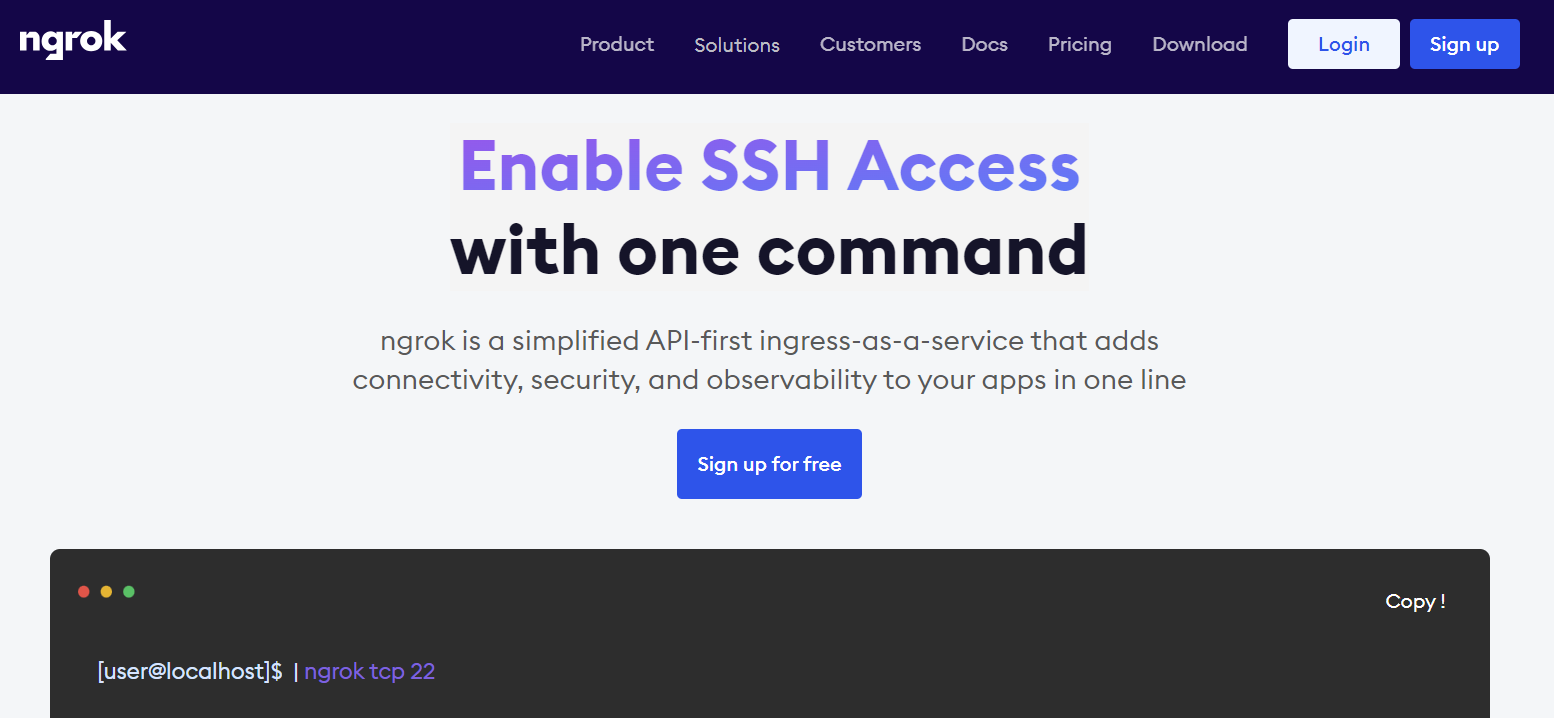

Сферы применения:

* Разработка и тестирование
* Демонстрации и совместное использование (можно легко поделиться своими локальными веб-приложениями с коллегами или клиентами, не разворачивая их на удаленном сервере)
* Удаленный доступ
* Тестирование на прочность (симуляция высокой нагрузки с помощью нескольких туннелей ngrok)

Чтобы воспользоваться основным функционалом ngrok, достаточно создать бесплатный аккаунт на сайте и получить токен.

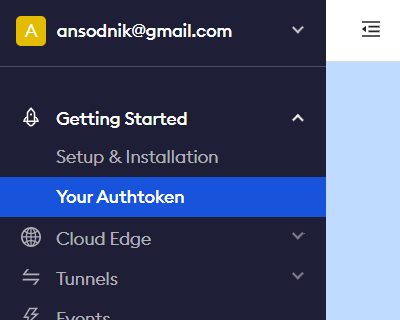

В Python есть удобная обертка для ngrok. Для её использования потребуется установить библиотеку pyngrok.

In [ ]:
%%capture
!pip install pyngrok

In [ ]:
import getpass  # getpass используется для безопасного получения паролей или чувствительной информации от пользователя без их отображения на экране
from pyngrok import ngrok, conf

print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()  # введенный токен будет использоваться для аутентификации пользователя на серверах ngrok

port = 8050  # устанавливаем порт, на котором будет запускаться веб-сервер
public_url = ngrok.connect(port).public_url  # здесь создается туннель к локальному веб-серверу, а затем извлекается общедоступный URL для этого туннеля
print(f" * ngrok tunnel http://127.0.0.1:{port} -> {public_url}")

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········


 * ngrok tunnel http://127.0.0.1:8050 -> https://ef76-34-74-95-198.ngrok-free.app


Однако, если мы вновь попробуем запустить код и откроем localhost или public_url, ничего не произойдет. Чтобы код сработал из Google Colab, его требуется запустить как приложение.

Запишем наш код в app.py.

In [ ]:
%%writefile app.py

import dash
from dash import dcc
from dash import html
import plotly.express as px
import pandas as pd


df = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [10, 11, 12, 13, 14]})

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dash Dashboard"),
    dcc.Graph(
        figure=px.scatter(df, x='X', y='Y', title="Sample Scatter Plot"),
        id='scatter-plot'
    )
])


if __name__ == '__main__':
    app.run_server(port=8050)

Writing app.py


Теперь запустим приложение и перейдем по public_url, чтобы увидеть его.

In [ ]:
!python app.py

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'app'
 * Debug mode: off
Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


Важно отметить еще один момент. Может возникнуть ситуация, когда данные, использующиеся для вашего приложения, существуют в виде глобальных переменных в Google Colab, а значит app.py не будет иметь к ним доступ. Решается просто - запишите ваши данные в файл, а затем прочитайте изнутри app.py. Главное, чтобы данные и app.py оказались в одной и той же директории.

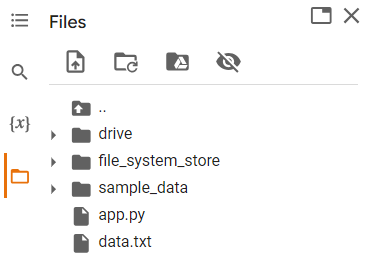